In [4]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import DistanceMetric
import numpy as np
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import GridSearchCV, train_test_split

import skfda
from skfda.ml.classification import KNeighborsClassifier



[135.80567152]


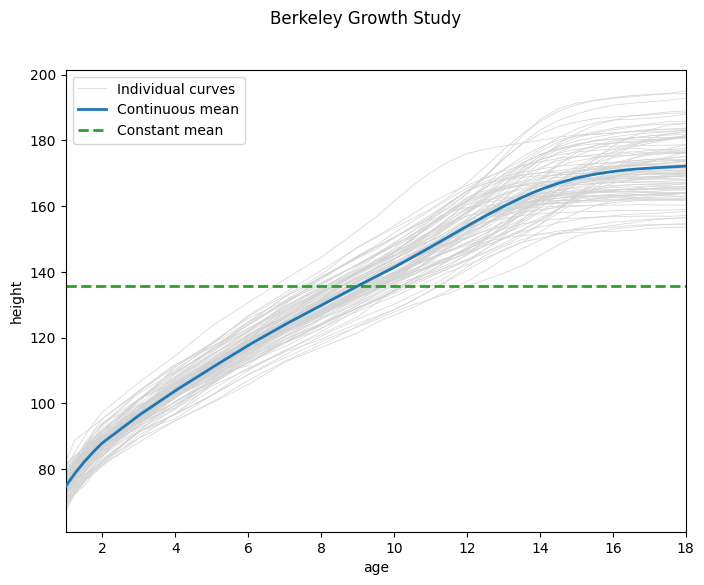

In [41]:
import numpy as np
import skfda
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Load height dataset
X, y = skfda.datasets.fetch_growth(return_X_y=True, as_frame=True)
X = X.iloc[:, 0].values  # Extract functional data

# Define colors
light_gray = "#D3D3D3"  # Light gray for individual curves
blue = "#1f77b4"  # Blue for the mean curve
green = "#2ca02c"  # Green for the constant line

def tuple_range(t):
    return max(t) - min(t)
rng = tuple_range(X.domain_range[0])
# Compute constant height
cte = X.mean().integrate().ravel()
cte_value = cte / rng
print(cte_value)

# Create figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Plot all curves in light gray on the same axis
X.plot(axes=ax, color=light_gray, linewidth=0.5, zorder=0)

# Plot mean curve in blue on the same axis
X.mean().plot(axes=ax, color=blue, linewidth=2, label="Continuous mean", zorder=10)

# Plot constant height line in green
ax.axhline(cte_value, color=green, linestyle="--", linewidth=2, label="Constant mean")

# Add legend
handles = [
    Line2D([0], [0], color=light_gray, linewidth=0.5, label="Individual curves"),
    Line2D([0], [0], color=blue, linewidth=2, label="Continuous mean"),
    Line2D([0], [0], color=green, linestyle="--", linewidth=2, label="Constant mean")
]
ax.legend(handles=handles)

ax.set_xlim(X.domain_range[0][0], X.domain_range[0][1])
# Show plot
plt.show()


In [11]:
y.categories

Index(['male', 'female'], dtype='object')

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.25,
    stratify=y,
    random_state=0,
)

In [7]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [8]:
pred = knn.predict(X_test)
print(pred)

[0 0 1 0 1 1 1 0 0 0 0 1 1 0 0 0 0 1 1 1 1 1 1 1]


In [9]:
from sklearn.metrics import DistanceMetric
from skfda.misc.metrics import l2_distance

class myMetric(DistanceMetric):
    def __init__(self):
        super().__init__()
    
    def pairwise(self, X, Y = None):
        return l2_distance(X, Y)

my_metric = myMetric()

In [10]:
from sklearn.neighbors import KNeighborsClassifier 
# Use it in KNeighborsClassifier 

neigh = KNeighborsClassifier(n_neighbors=2, metric=my_metric)
neigh.fit(X_train, y_train)

ValueError: Expected a 2-dimensional container but got <class 'skfda.representation.grid.FDataGrid'> instead. Pass a DataFrame containing a single row (i.e. single sample) or a single column (i.e. single feature) instead.

In [ ]:
X_df_test = pd.DataFrame(X_test)
neigh.predict(X_df_test)

---

From here on this will be the example of a Mixed Multivariate data distance calculation. The first thing I will do i create the dataframe with the data I will be using.



In [11]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from skfda import datasets
from skfda.exploratory.depth import IntegratedDepth, ModifiedBandDepth
from skfda.exploratory.visualization import Boxplot
from skfda.representation.grid import FDataGrid
from skfda.representation import FData
import pandas as pd

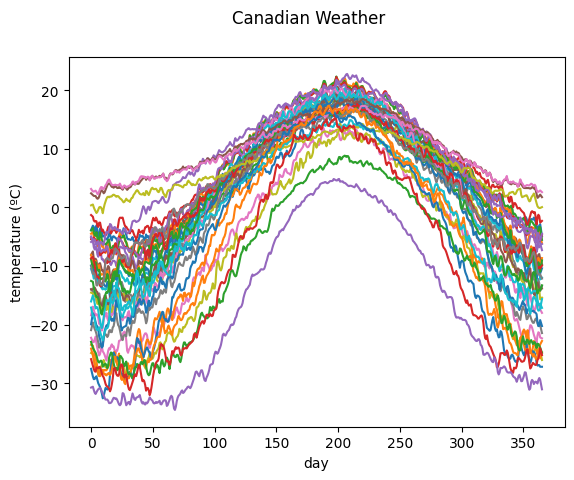

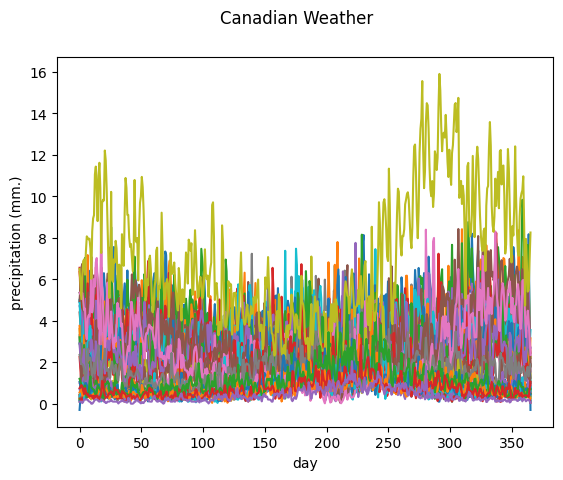

In [12]:
X, y = datasets.fetch_weather(return_X_y=True, as_frame=True)
fd = X.iloc[:, 0].values
fd_temperatures = fd.coordinates[0]
fd_precipitations = fd.coordinates[1]
fd_temperatures.plot()
fd_precipitations.plot()

print()

In [13]:
fd_temperatures.n_samples

35

In [14]:
y.shape

(35,)

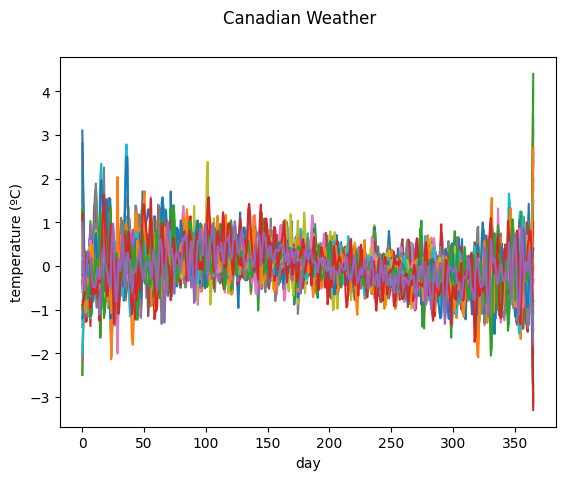

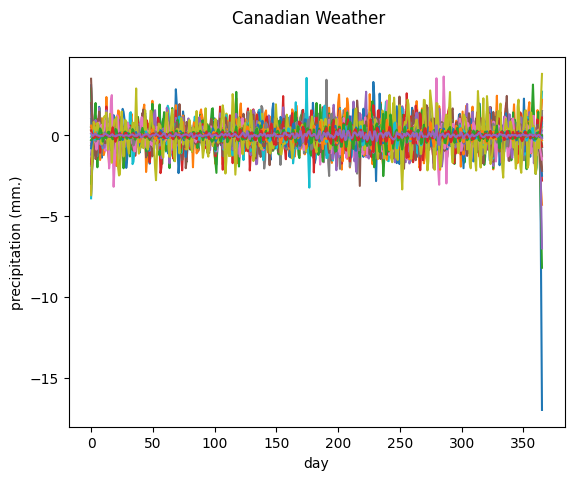

In [15]:
fd_D_temperatures = fd_temperatures.derivative(order=1)
fd_D_precipitations = fd_precipitations.derivative(order=1)

fd_D_temperatures.plot()
fd_D_precipitations.plot()
print()


In [16]:
fd_D_temperatures.data_matrix.shape

(35, 365, 1)

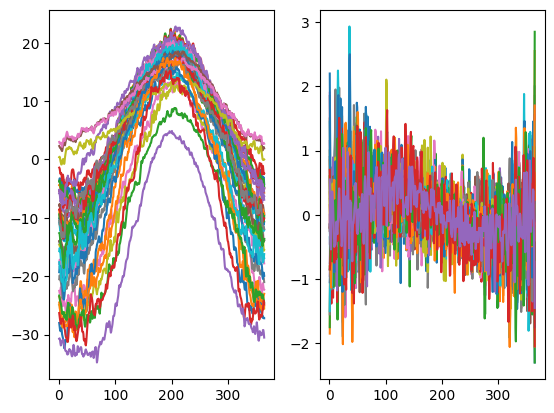

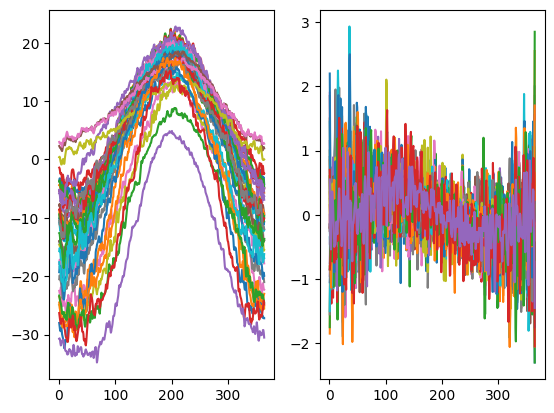

In [17]:
# Create a FDataGrid vector valued with a function and a derivative

data_matrix = np.concatenate([
    fd_temperatures.data_matrix, 
    fd_D_temperatures.data_matrix
], axis=2) 

fd_vector = FDataGrid(
    data_matrix=data_matrix, 
    grid_points=fd_temperatures.grid_points,
)

# Plot the vector-valued function
fd_vector.plot()


Create the dataframe


In [18]:
mixed_fd = pd.DataFrame(
    {
        "category": y,
        "temperatures": fd_temperatures,
        "temperature_derivatives": fd_D_temperatures,
        "precipitations_vector": fd_vector,
    }
)

In [19]:
fd = mixed_fd["precipitations_vector"]

In [20]:
mixed_fd.head()

,category,temperatures,temperature_derivatives,precipitations_vector
0,Atlantic,Data set: [[[-3.6] [-3.1] [-3.4] [-4....,Data set: [[[ 0.9 ] [ 0.1 ] [-0.65] [...,Data set: [[[-3.6 0.9 ] [-3.1 0.1 ] ...
1,Atlantic,Data set: [[[-4.4] [-4.2] [-5.3] [-5....,Data set: [[[ 0.85] [-0.45] [-0.6 ] [...,Data set: [[[-4.4 0.85] [-4.2 -0.45] ...
2,Atlantic,Data set: [[[-3.8] [-3.5] [-4.6] [-5....,Data set: [[[ 1. ] [-0.4 ] [-0.75] [...,Data set: [[[-3.8 1. ] [-3.5 -0.4 ] ...
3,Atlantic,Data set: [[[-1.4] [-1.6] [-2.5] [-2....,Data set: [[[ 0.15] [-0.55] [-0.35] [...,Data set: [[[-1.4 0.15] [-1.6 -0.55] ...
4,Atlantic,Data set: [[[ -5.8] [ -5.6] [ -7.3] [...,Data set: [[[ 1.15] [-0.75] [-0.7 ] [...,Data set: [[[ -5.8 1.15] [ -5.6 -0.7...


In [21]:
from skfda.representation._mixed_data_extension import MetricAccessor

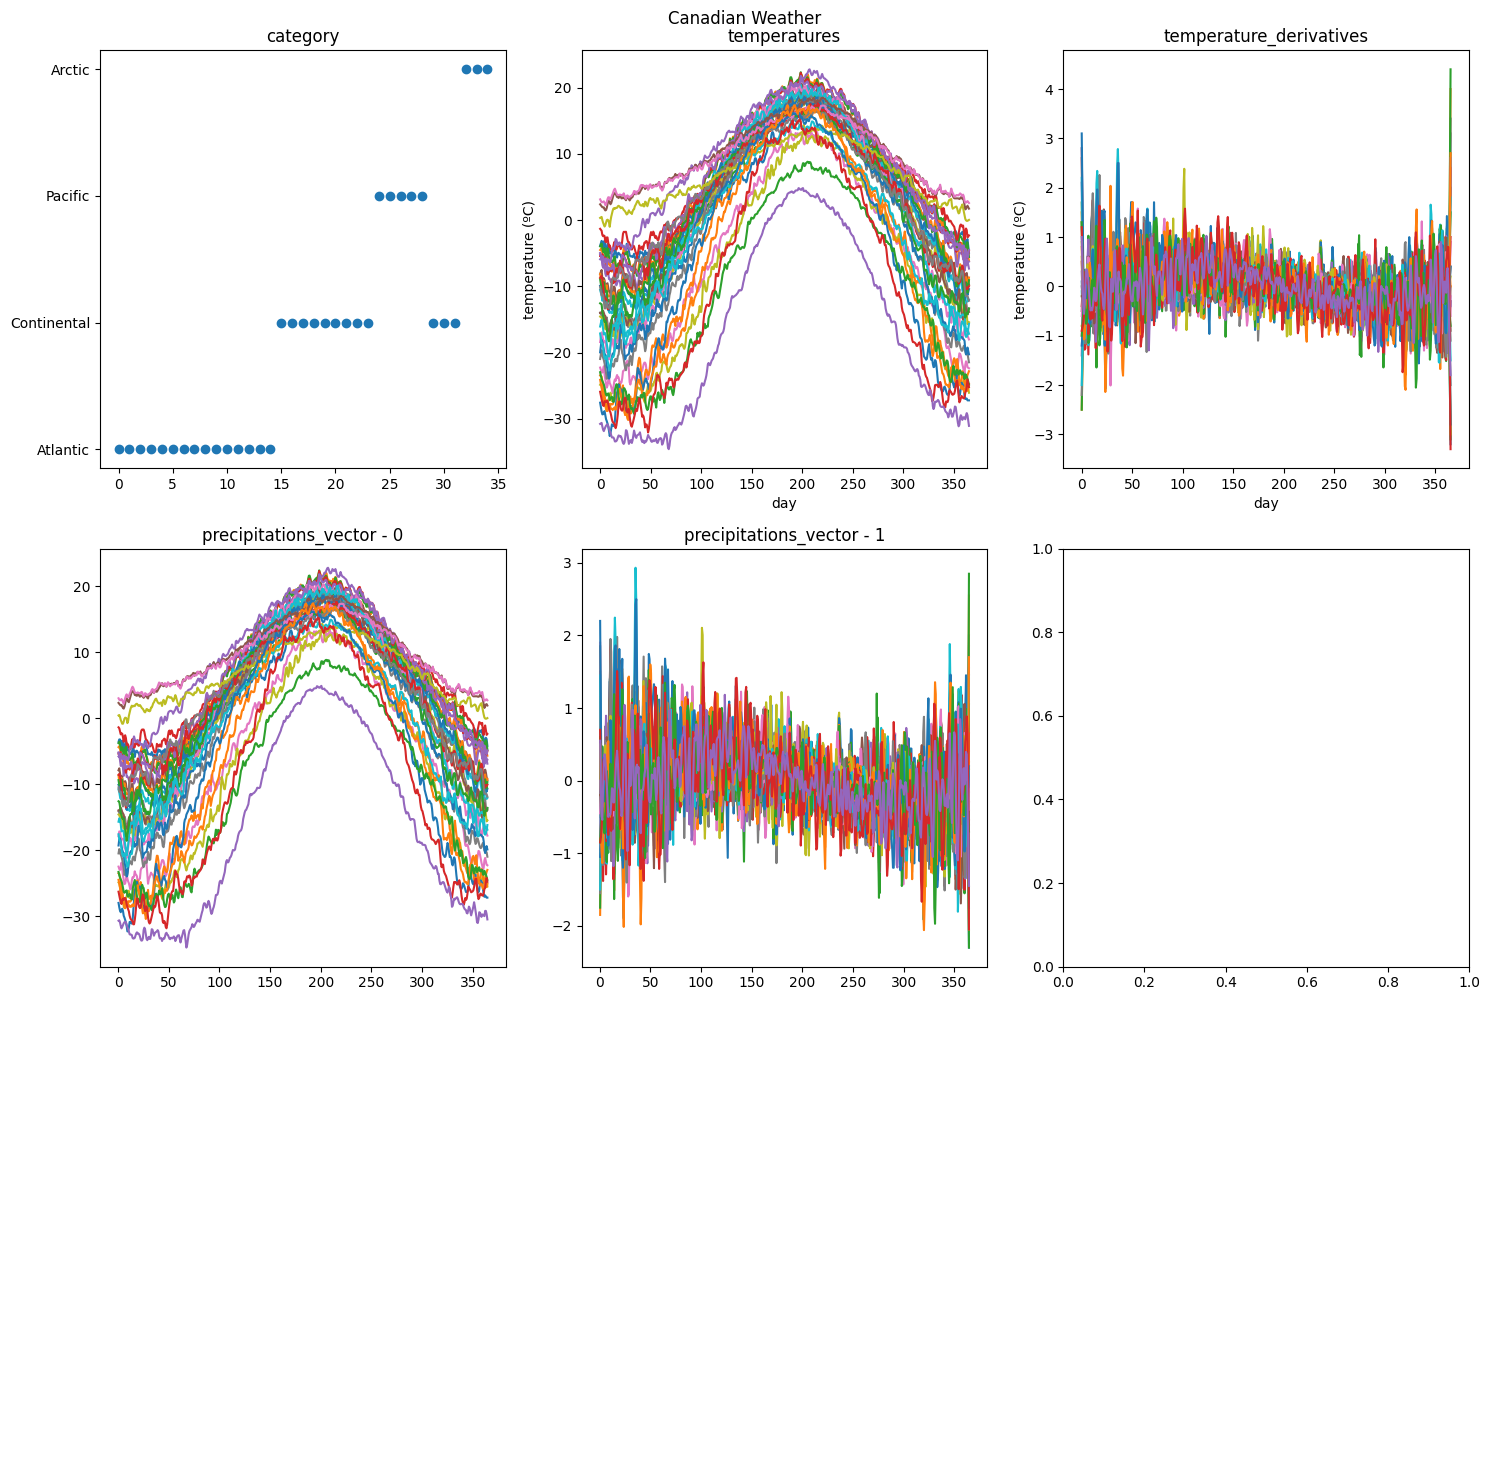

In [22]:
mixed_fd.metric.plot_dataframe()


In [23]:
import numpy as np
matriz_4x4 = np.random.rand(4, 4)

matriz_4x4

array([[0.23223205, 0.17326184, 0.14595521, 0.24389807],
       [0.11616702, 0.78180653, 0.51435117, 0.33003147],
       [0.73813027, 0.28919702, 0.88173404, 0.09351204],
       [0.87985516, 0.62385346, 0.03305746, 0.44108779]])

In [24]:
matriz_4x4*np.array(13)

array([[ 3.01901661,  2.25240391,  1.89741773,  3.17067497],
       [ 1.51017132, 10.16348491,  6.68656515,  4.29040913],
       [ 9.59569345,  3.75956131, 11.4625425 ,  1.21565657],
       [11.4381171 ,  8.11009495,  0.42974702,  5.73414132]])

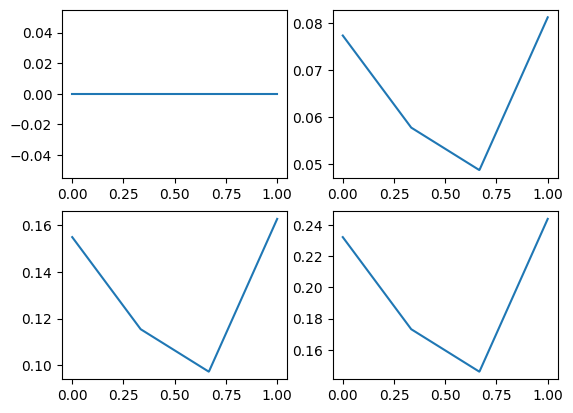

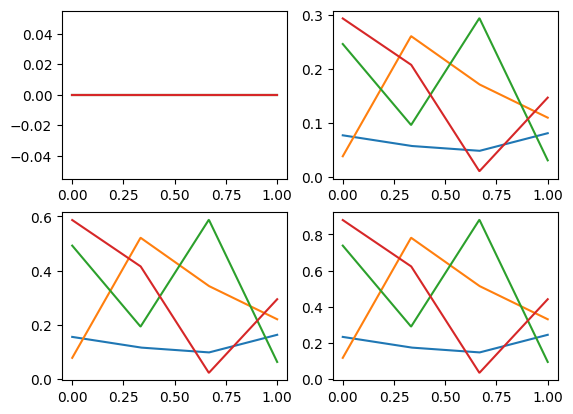

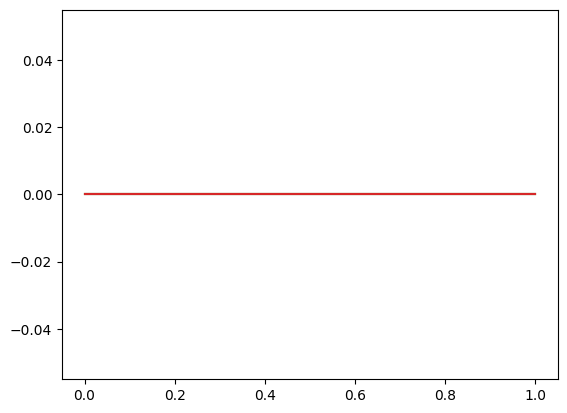

In [36]:
# We want to create a multivariate fdata grid

grid_points = np.linspace(0, 1, 4)
data_matrix = np.zeros((4, 4, 4))
for i in range(4):
    for j in range(4):
        data_matrix[i, j] = matriz_4x4[i, j] * np.array(grid_points)

fdata = FDataGrid(
    data_matrix=data_matrix,
    grid_points=grid_points,
)
fdata[0].plot()

#plot only all the functions in the second dimention
fdata.plot()

# Create a FDataGrid with only the second dimension:
data_matrix = fdata.data_matrix[:, :, 0]
fdata_2d = FDataGrid(
    data_matrix=data_matrix,
    grid_points=grid_points,
).plot()

In [37]:
len(3)

TypeError: object of type 'int' has no len()